# Sesión 4: Resolución de EDOs con Python 1

In [1]:
# Importar librerías a utilizar
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as spi

El *solver* a utilizar es *solve_ivp* de *scipy.integrate*, la documentación se puede encontrar en *https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html*

## Ejemplo 1

Analicemos la siguiente ecuación diferencial:

$$ \frac{\partial ^2 y}{\partial x^2} = 0 $$

Para llevar a cabo la resolución mediante Python será necesario reducir el orden de la ecuación diferencial a través de un sistema de ecuaciones diferenciales. Se crea la variable $A(x) = \frac{d y}{d x}$, con lo que queda este sistema de ecuaciones diferenciales:

$$ A(x) = \frac{d y}{d x} $$
$$ \frac{d A}{d x} = 0 $$

Los valores iniciales definidos son $y(x=0) = 200$ y $y'(x = 0) = 100$

In [24]:
# Vector asociado a la variable independiente
x = np.linspace(0, 50, 10)

# Valores iniciales asociados a x = 0
y_0 = 200
dydx_0 = 100

# Sistema de ecuaciones diferenciales
def eq(x, y):
    A = y[1]
    dAdx = 0
    return [A, dAdx]

# Resolución del sistema de ecuaciones diferenciales
res = spi.solve_ivp(eq, [0,50], [y_0, dydx_0], t_eval = x)
res

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  5.55555556, 11.11111111, 16.66666667, 22.22222222,
       27.77777778, 33.33333333, 38.88888889, 44.44444444, 50.        ])
 t_events: None
        y: array([[ 200.        ,  755.55555556, 1311.11111111, 1866.66666667,
        2422.22222222, 2977.77777778, 3533.33333333, 4088.88888889,
        4644.44444444, 5200.        ],
       [ 100.        ,  100.        ,  100.        ,  100.        ,
         100.        ,  100.        ,  100.        ,  100.        ,
         100.        ,  100.        ]])
 y_events: None

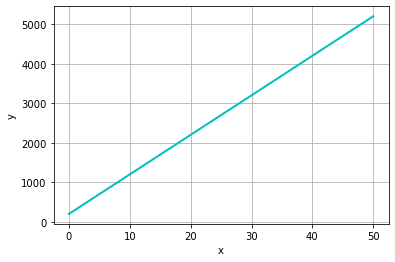

In [33]:
# Graficar el resultado obtenido
plt.plot(x, res.y[0], 'c-', lw=2)

# Personalización gráfico
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Esta ecuación diferencial posee solución analítica (variables separables) que viene dada por: $y(x) = C_1 * x + C_2 = 100 * x + 200$. Comparando la resolución con métodos numéricos con la solución analítica

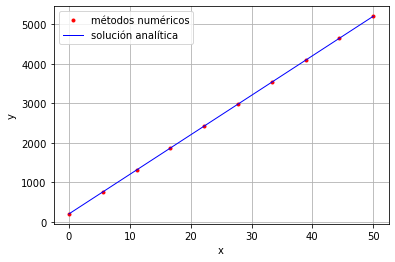

In [34]:
# Vector asociado a la variable dependiente usando la solución analítica
y_a = np.array(100*x + 200)

# Graficar el resultado mediante métodos numéricos y mediante la solución analícia
plt.plot(x, res.y[0], 'r.', lw=10, label='métodos numéricos')
plt.plot(x, y_a, 'b-', lw=1, label='solución analítica')

# Personalización gráfico
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Se puede observar que ambas soluciones coinciden como era de esperar

## Ejemplo 2

Analicemos la siguiente ecuación diferencial:

$$ y \frac{\partial ^2 y}{\partial x^2} + 2x \frac{\partial y}{\partial x} = 0 $$

Se crea la variable $A(x) = \frac{d y}{d x}$, con lo que queda este sistema de ecuaciones diferenciales:

$$ A(x) = \frac{d y}{d x} $$
$$ \frac{d A}{d x} = \frac{-2x A(x)}{y} $$

Los valores iniciales definidos son $y(x=0) = 200$ y $y'(x = 0) = 100$

In [35]:
# Vector asociado a la varaible independiente
x = np.linspace(0, 50, 10)

# Valores iniciales asociados a x = 0
y_0 = 200
dydx_0 = 100

# Sistema de ecuaciones diferenciales
def eq(x, y):
    A = y[1]
    dAdx = -2*x*y[1]/y[0]
    return [A, dAdx]

# Resolución del sistema de ecuaciones diferenciales
res = spi.solve_ivp(eq, [0,50], [y_0, dydx_0], t_eval = x)
res

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 38
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  5.55555556, 11.11111111, 16.66666667, 22.22222222,
       27.77777778, 33.33333333, 38.88888889, 44.44444444, 50.        ])
 t_events: None
        y: array([[ 200.        ,  742.85105854, 1244.14091818, 1698.35813302,
        2105.79278982, 2468.43957796, 2788.35313555, 3068.12990135,
        3310.94874471, 3520.50043985],
       [ 100.        ,   94.32809324,   86.02988261,   77.49941529,
          69.20211523,   61.29130921,   53.87076532,   46.99874867,
          40.6883743 ,   34.9119138 ]])
 y_events: None

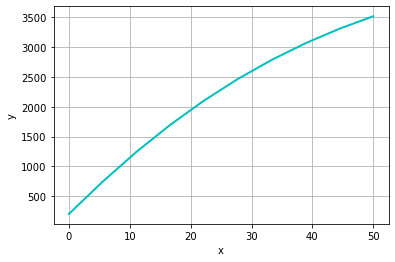

In [36]:
# Graficar el resultado obtenido
plt.plot(x, res.y[0], 'c-', lw=2)

# Personalización gráfico
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()